In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)


dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [4]:
dengue.dtypes
# dengue.info()

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [6]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
dengue['Year'].unique()

[2016, 2017, 2018, 2019, 2020]
Categories (5, int64): [2016, 2017, 2018, 2019, 2020]

In [9]:
dengue_2020 = dengue[dengue['Year'] == 2020]
dengue_2019 = dengue[dengue['Year'] == 2019]
dengue_2018 = dengue[dengue['Year'] == 2018]
dengue_2017 = dengue[dengue['Year'] == 2017]
dengue_2016 = dengue[dengue['Year'] == 2016]

<h1>Bar Plot</h1>

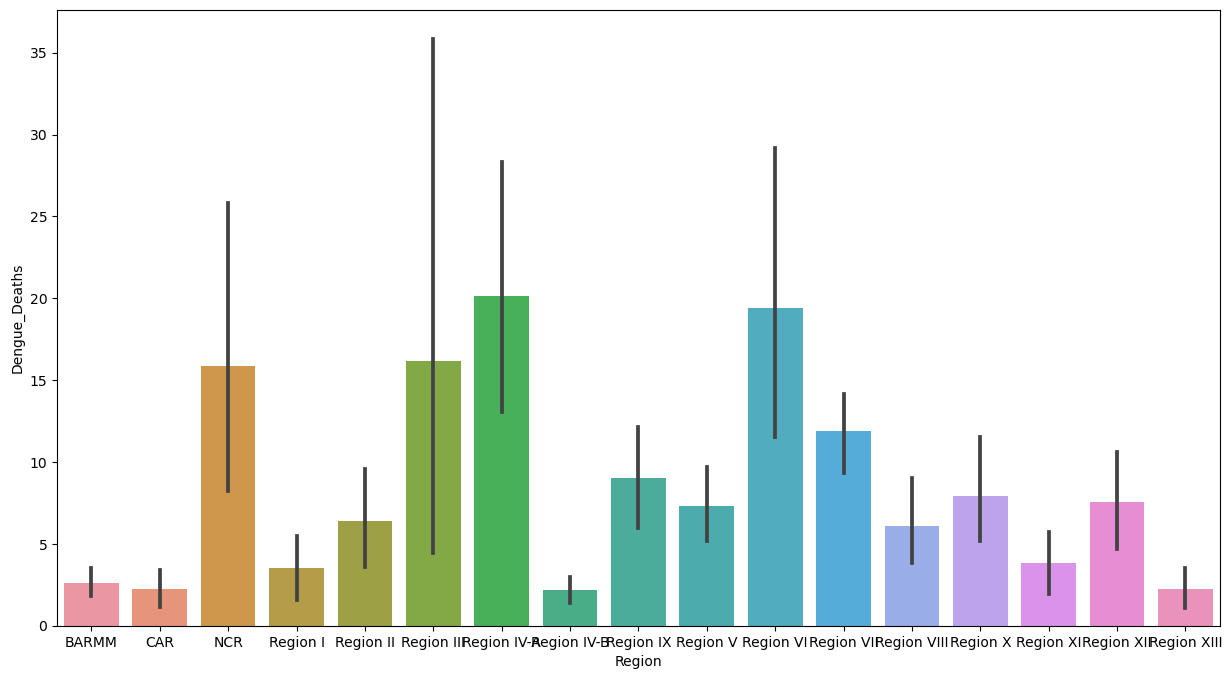

In [10]:
sns.barplot(data=dengue_2019, x="Region" , y="Dengue_Deaths")
plt.gcf().set_size_inches(15, 8)
plt.show()

<h1>Line Plot</h1>

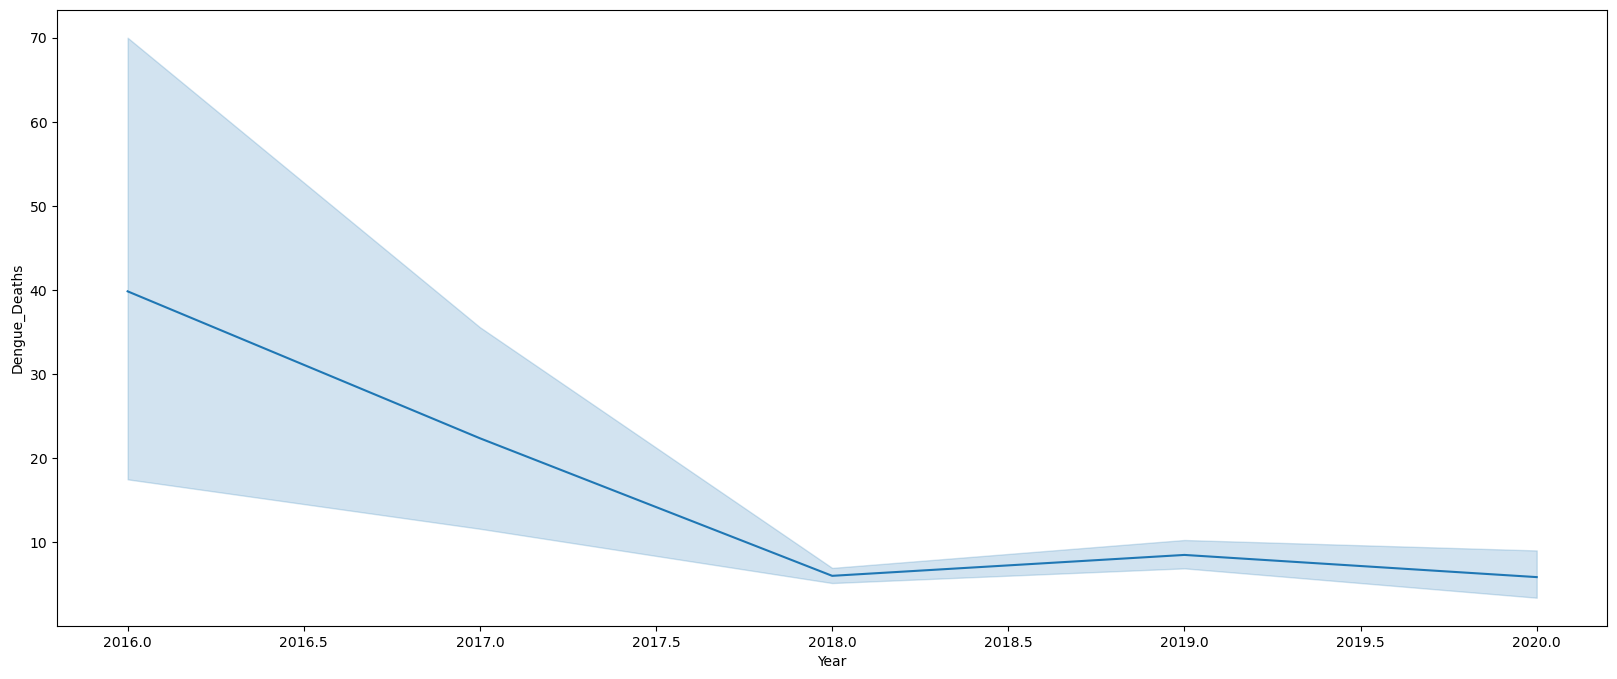

In [11]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year" )
plt.gcf().set_size_inches(20, 8)
plt.show()

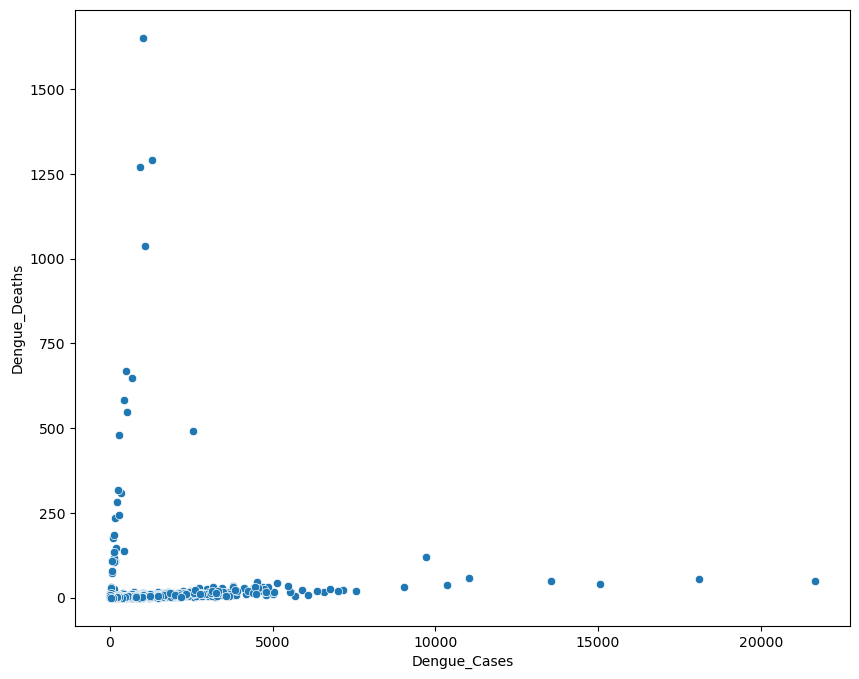

In [12]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases" )
plt.gcf().set_size_inches(10, 8)
plt.show()

<h1>Box plot</h1>

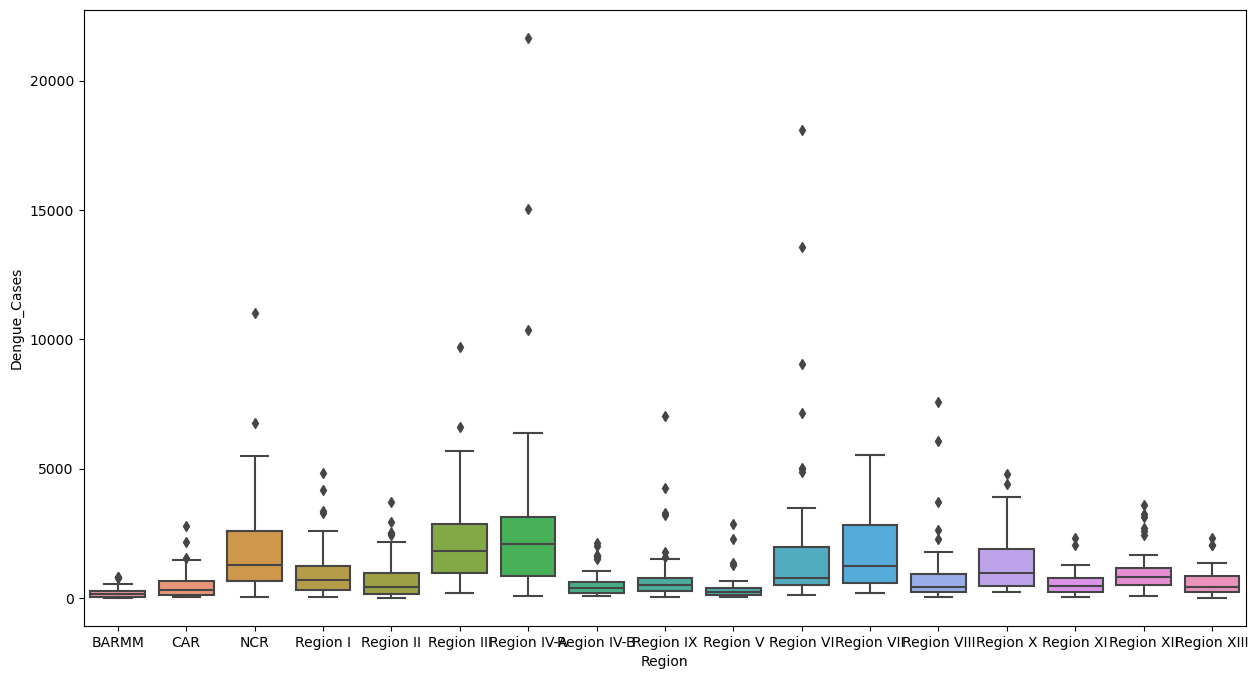

In [13]:
sns.boxplot(data=dengue, y="Dengue_Cases", x="Region" )
plt.gcf().set_size_inches(15, 8)
plt.show()

<h1>dengue cases in 2019</h1>

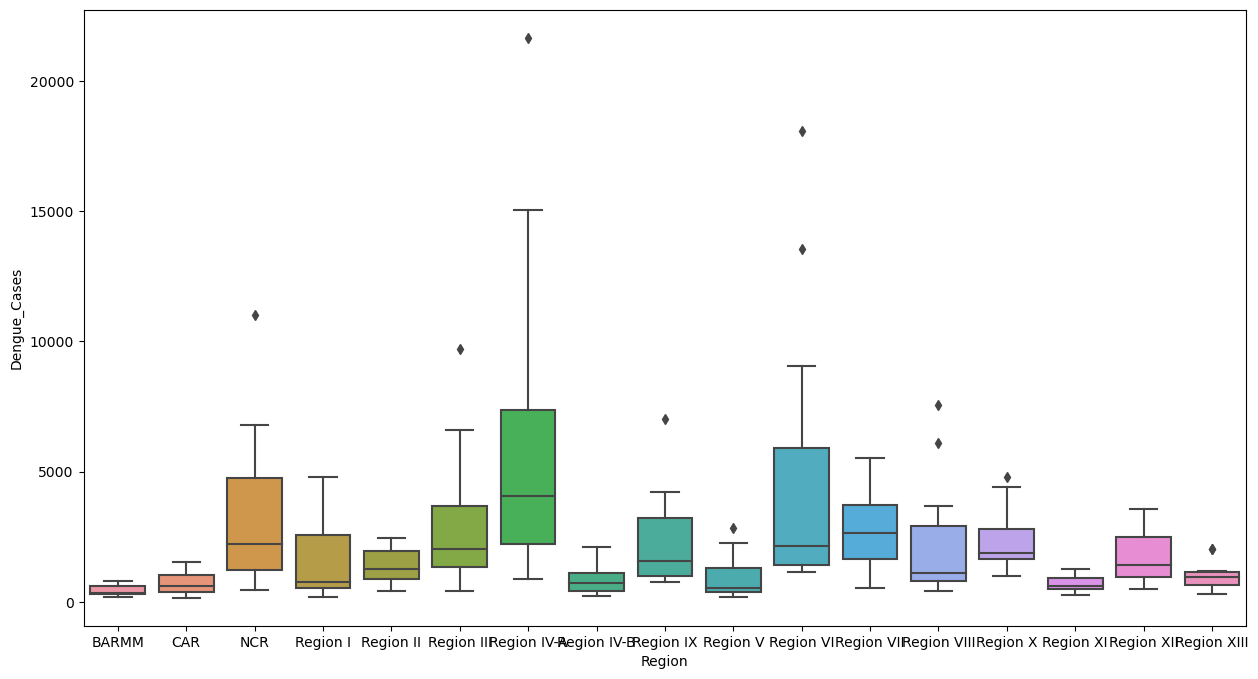

In [14]:
sns.boxplot(data=dengue_2019, y="Dengue_Cases", x="Region" )
plt.gcf().set_size_inches(15, 8)
plt.show()

<h1>dengue cases in </h1>

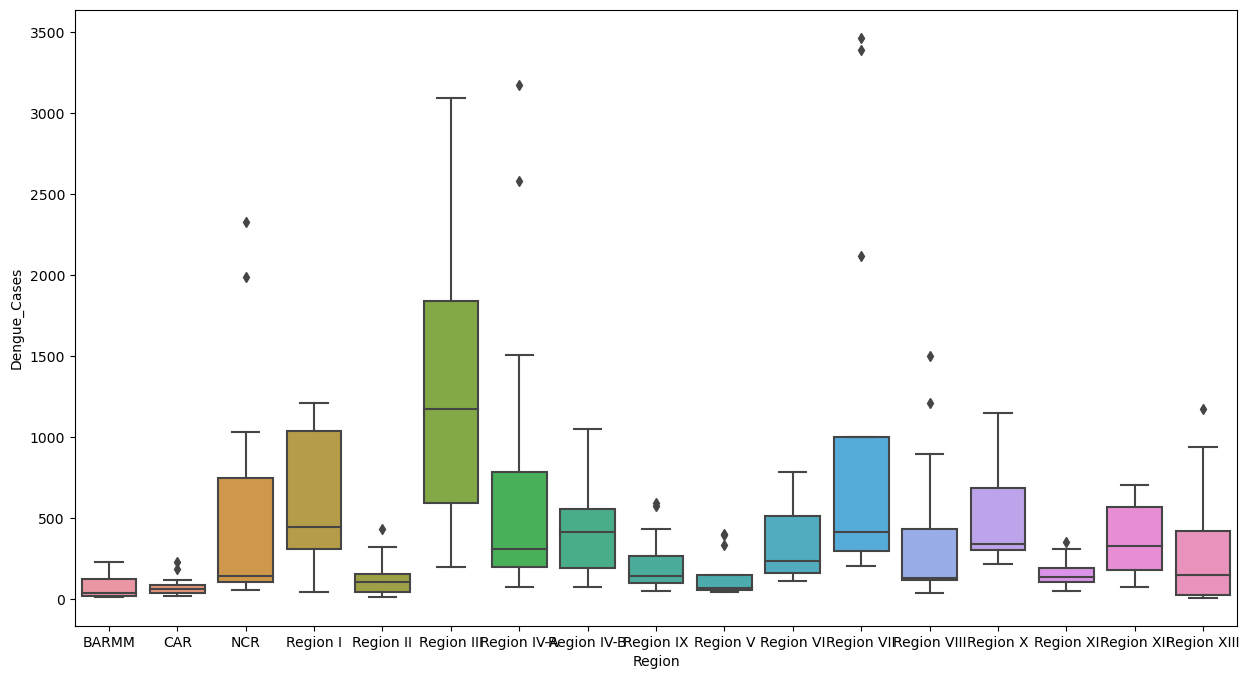

In [15]:
sns.boxplot(data=dengue_2020, y="Dengue_Cases", x="Region" )
plt.gcf().set_size_inches(15, 8)
plt.show()

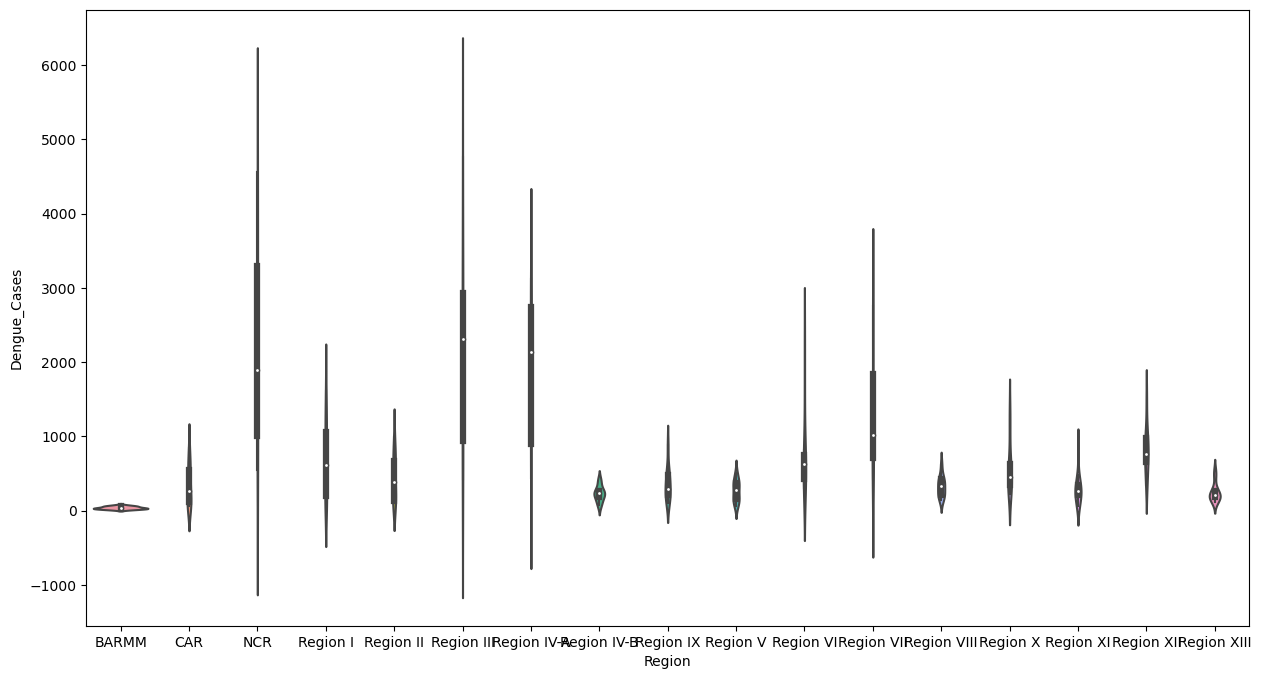

In [16]:
sns.violinplot(data=dengue_2017, y="Dengue_Cases", x="Region" )
plt.gcf().set_size_inches(15, 8)
plt.show()

<h1>Insight 1 - Total Dengue Cases per Year<h1>

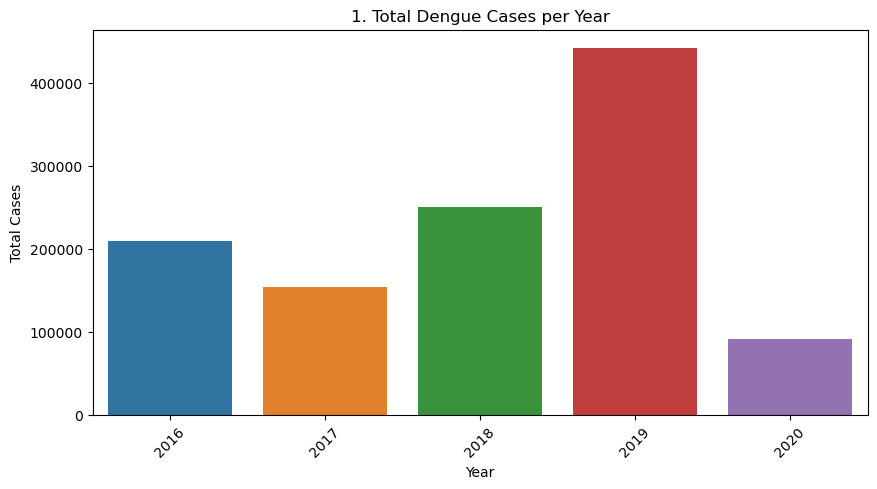

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dengue.groupby('Year')['Dengue_Cases'].sum().reset_index(), x='Year', y='Dengue_Cases')
plt.title("1. Total Dengue Cases per Year")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 2 - Total Dengue Deaths per Year<h1>

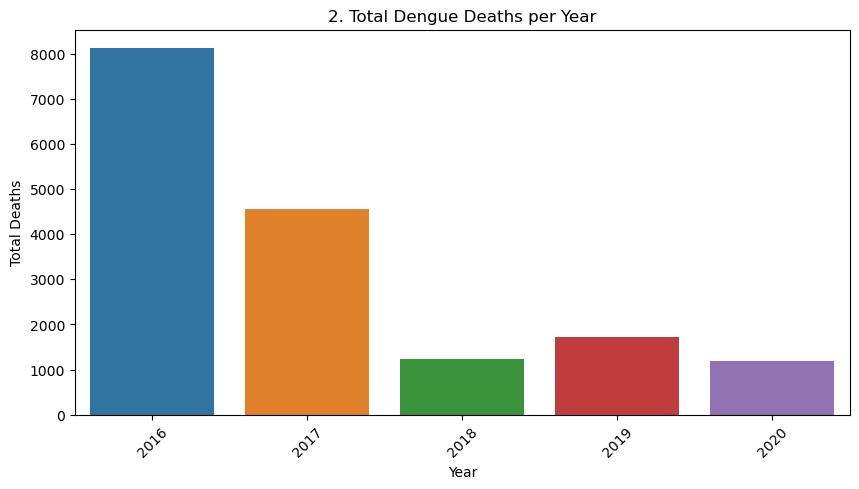

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index(), x='Year', y='Dengue_Deaths')
plt.title("2. Total Dengue Deaths per Year")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 3 - Average Monthly Dengue Cases (All Years and Regions)<h1>

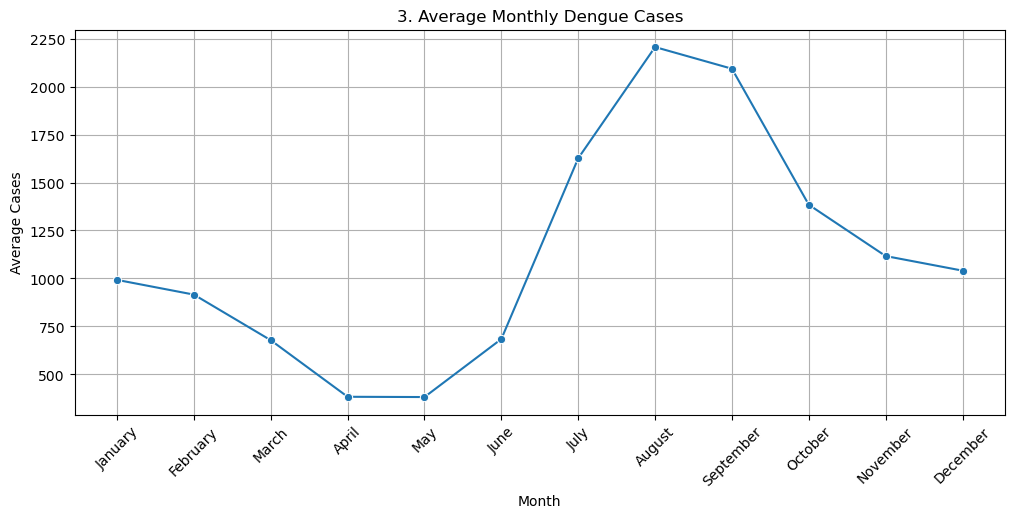

In [28]:
avg_monthly = dengue.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)

plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_monthly, marker='o')
plt.title("3. Average Monthly Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1>Insight 5 - Dengue Cases vs. Dengue Deaths by Region<h1>

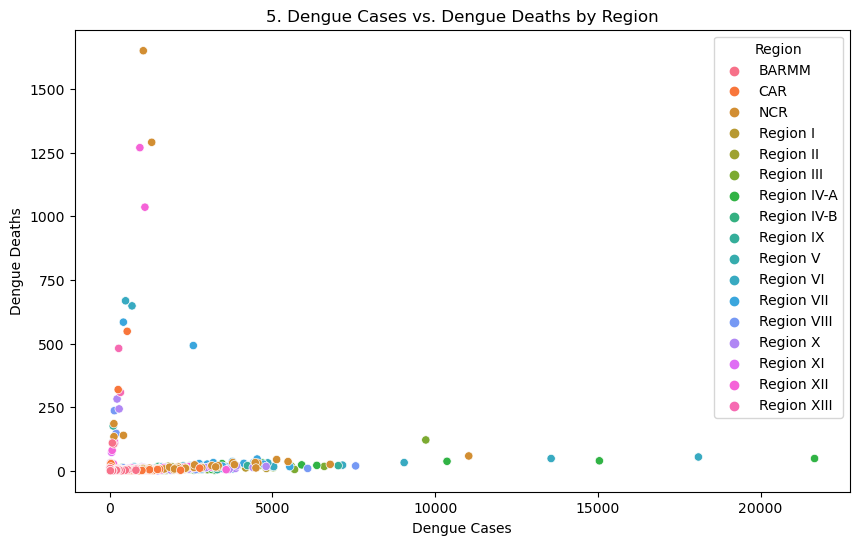

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Region')
plt.title("5. Dengue Cases vs. Dengue Deaths by Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()


<h1>Insight 6 - Average Monthly Dengue Deaths<h1>

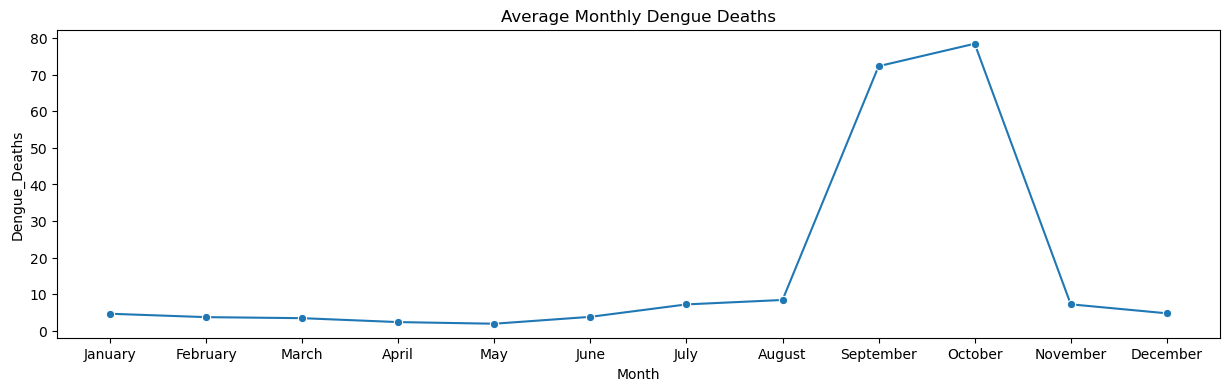

In [38]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)
plt.figure(figsize=(15, 4))
sns.lineplot(data=monthly_deaths, marker='o')
plt.title("Average Monthly Dengue Deaths")
plt.show()

<h1>Insight 7 -Year with Highest Dengue Deaths<h1>

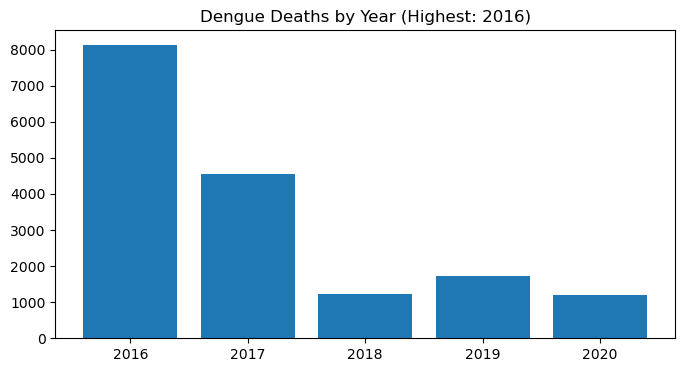

In [39]:
death_by_year = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(8, 4))
plt.bar(death_by_year.index, death_by_year.values)
plt.title(f"Dengue Deaths by Year (Highest: {death_by_year.idxmax()})")
plt.show()

<h1>Insight 8 - Total Dengue Deaths by Region<h1>

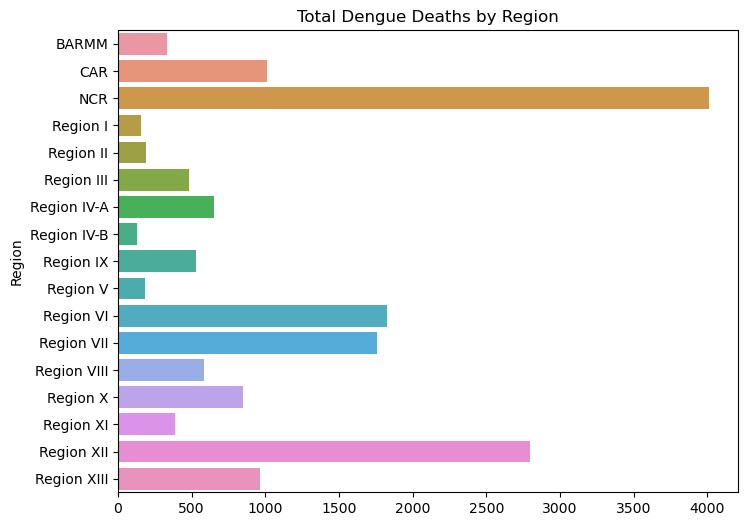

In [41]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_deaths.values, y=region_deaths.index)
plt.title("Total Dengue Deaths by Region")
plt.show()

<h1>Insight 9 - Dengue Cases Over Time<h1>

<Figure size 1000x600 with 0 Axes>

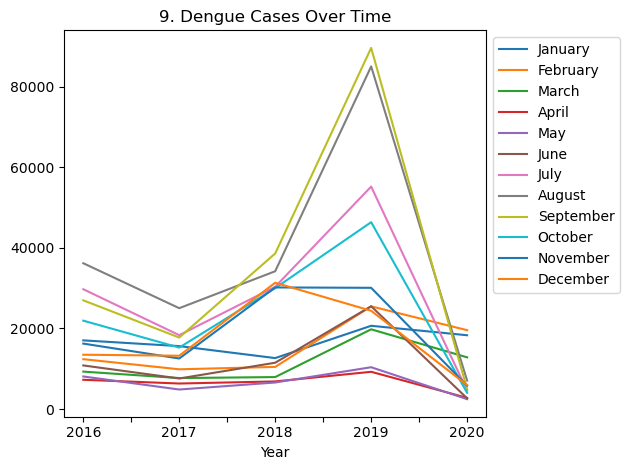

In [42]:
time_series = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack().reindex(columns=month_order)
plt.figure(figsize=(10, 6))
time_series.plot(kind='line')
plt.title("9. Dengue Cases Over Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<h1>Insight 10 - Heatmap of Average Cases by Region and Month<h1>

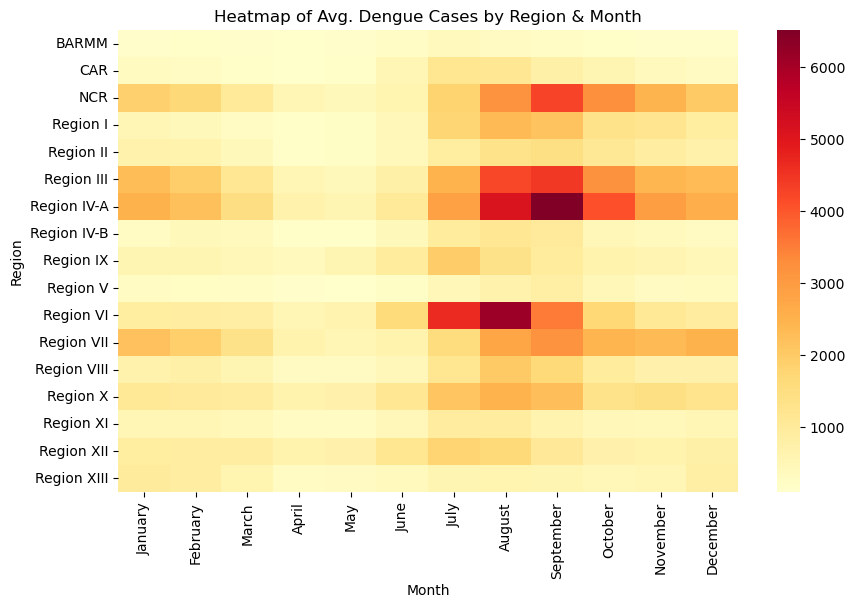

In [44]:
pivot_cases = dengue.pivot_table(index='Region', columns='Month', values='Dengue_Cases', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_cases, cmap='YlOrRd')
plt.title("Heatmap of Avg. Dengue Cases by Region & Month")
plt.show()

<h1>Insight 11 - Distribution of Dengue Cases per Region<h1>

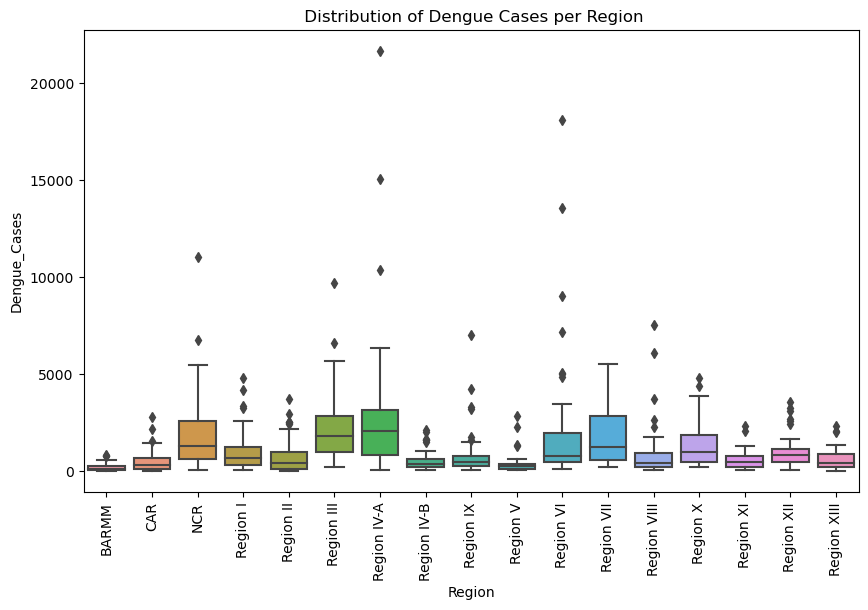

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dengue, x='Region', y='Dengue_Cases')
plt.title(" Distribution of Dengue Cases per Region")
plt.xticks(rotation=90)
plt.show()

<h1>Insight 12 - Distribution of Dengue Deaths per Region<h1>

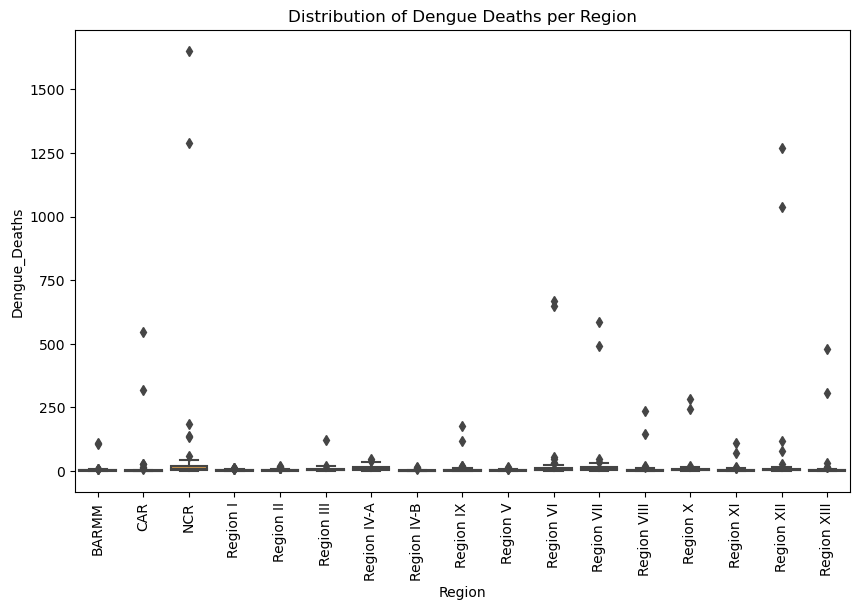

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dengue, x='Region', y='Dengue_Deaths')
plt.title("Distribution of Dengue Deaths per Region")
plt.xticks(rotation=90)
plt.show()

<h1>Insight 13 - Heatmap of Average Deaths by Region and Month<h1>

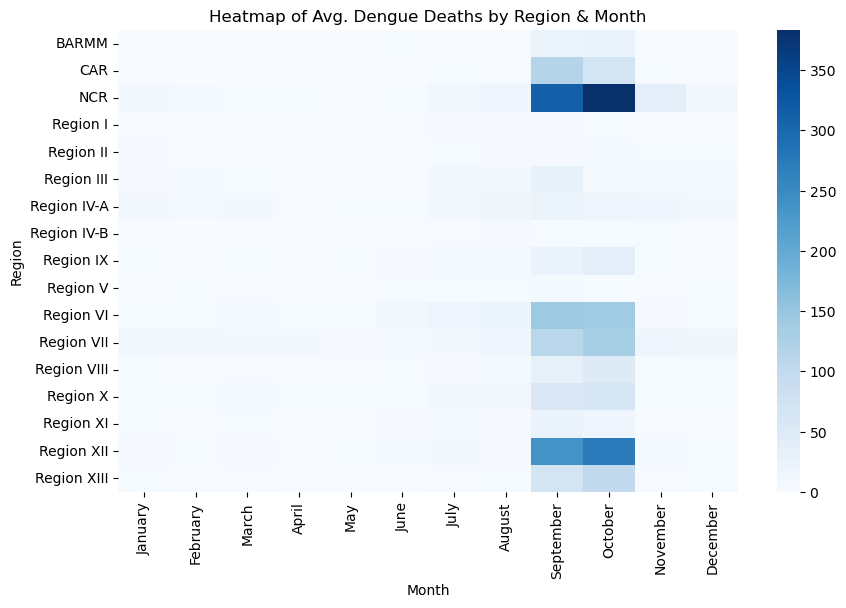

In [49]:
pivot_deaths = dengue.pivot_table(index='Region', columns='Month', values='Dengue_Deaths', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_deaths, cmap='Blues')
plt.title("Heatmap of Avg. Dengue Deaths by Region & Month")
plt.show()

<h1>Insight 14 - Yearly Dengue Cases in Region I<h1>

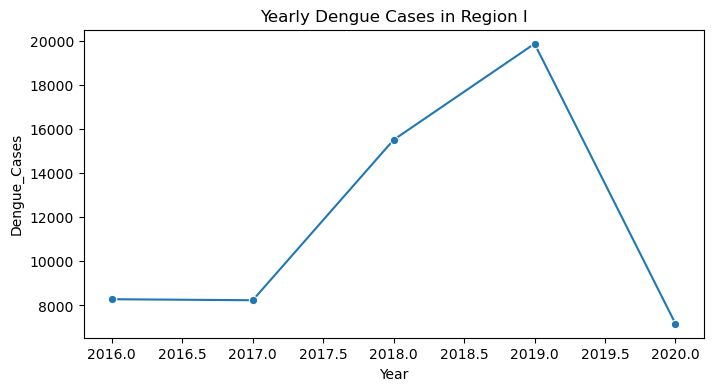

In [51]:
region1 = dengue[dengue['Region'] == 'Region I']
region1_grouped = region1.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=region1_grouped, marker='o')
plt.title("Yearly Dengue Cases in Region I")
plt.show()

<h1>Insight - 15 Death Rate by Region<h1>

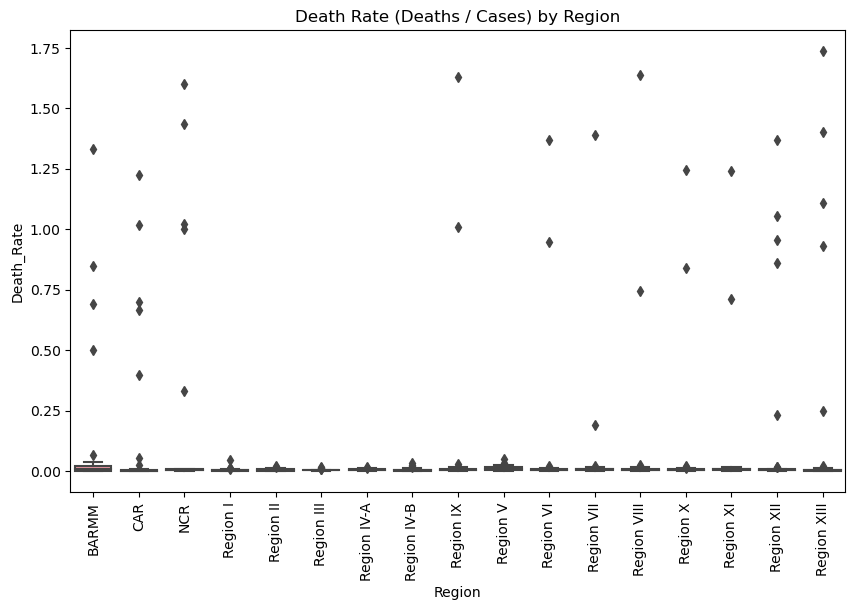

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dengue, x='Region', y='Death_Rate')
plt.title("Death Rate (Deaths / Cases) by Region")
plt.xticks(rotation=90)
plt.show()

<h1>Insight 16 - Average Deaths per Month<h1>

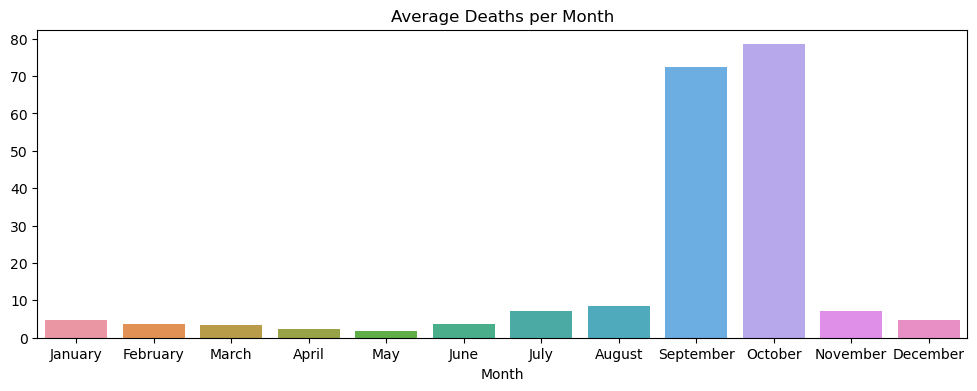

In [56]:
avg_deaths_month = dengue.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)
plt.figure(figsize=(12, 4))
sns.barplot(x=avg_deaths_month.index, y=avg_deaths_month.values)
plt.title("Average Deaths per Month")
plt.show()

<h1>Insight 17 - Top 5 Highest Monthly Cases<h1>

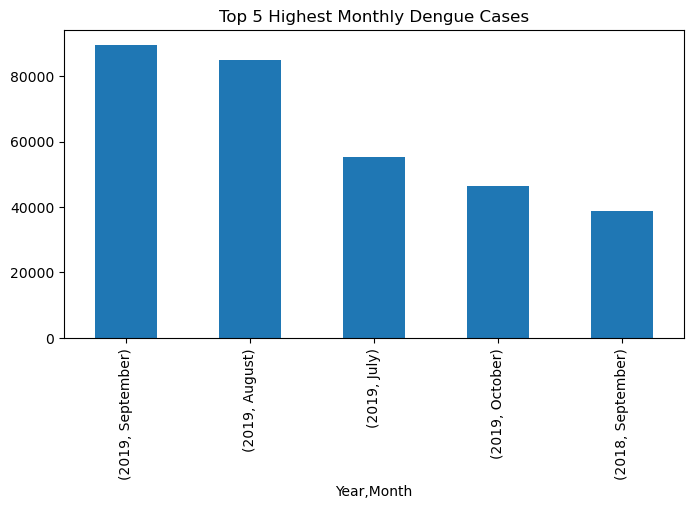

In [59]:
top_months = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
top_months.plot(kind='bar')
plt.title("Top 5 Highest Monthly Dengue Cases")
plt.show()

<h1>Insight 18 - Region I vs Region III - Cases Over Years<h1>

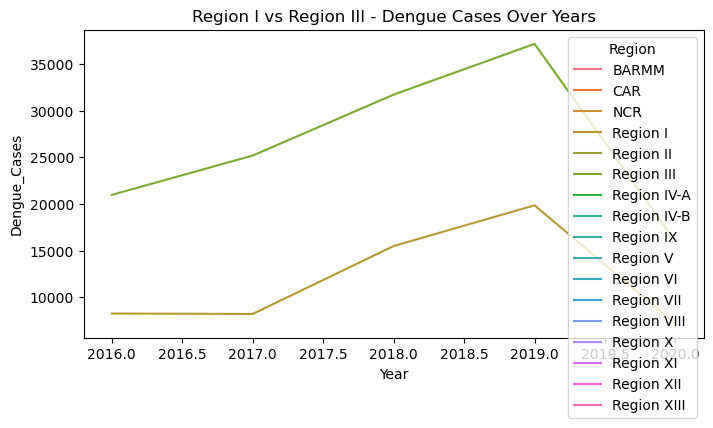

In [60]:
subset = dengue[dengue['Region'].isin(['Region I', 'Region III'])]
plt.figure(figsize=(8, 4))
sns.lineplot(data=subset, x='Year', y='Dengue_Cases', hue='Region', estimator='sum', ci=None)
plt.title("Region I vs Region III - Dengue Cases Over Years")
plt.show()

<h1>Insight 19 - Region with Lowest Average Cases<h1>

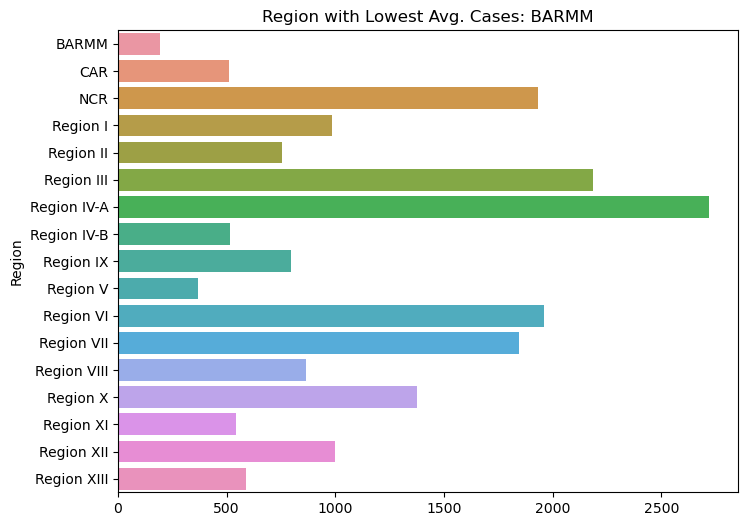

In [62]:
region_avg_cases = dengue.groupby('Region')['Dengue_Cases'].mean()
lowest_region = region_avg_cases.idxmin()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_avg_cases.values, y=region_avg_cases.index)
plt.title(f"Region with Lowest Avg. Cases: {lowest_region}")
plt.show()

<h1>Insight 20 - Correlation Heatmap<h1>

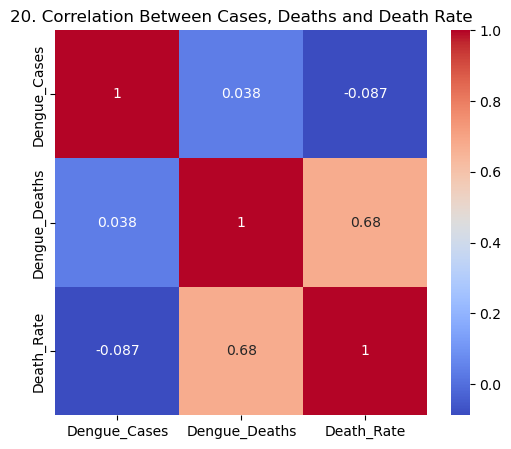

In [63]:
corr = dengue[['Dengue_Cases', 'Dengue_Deaths', 'Death_Rate']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("20. Correlation Between Cases, Deaths and Death Rate")
plt.show()